In [45]:
import pandas as pd
df1 = pd.read_csv("rig_1630167032.0654502.csv")
df_wob = pd.read_csv("WOB_1630166310.7207458.csv")
df_wob = df_wob[1:]
min_time = min(df1["time_s"])
max_time = max(df1["time_s"])
df_wob = df_wob[df_wob["time_s"] > min_time]
df_wob = df_wob[df_wob["time_s"] < max_time]

df_power = pd.read_csv("power_meter_1630166310.7556403.csv")
df_power = df_power[df_power["time_s"] > min_time]
df_power = df_power[df_power["time_s"] < max_time]


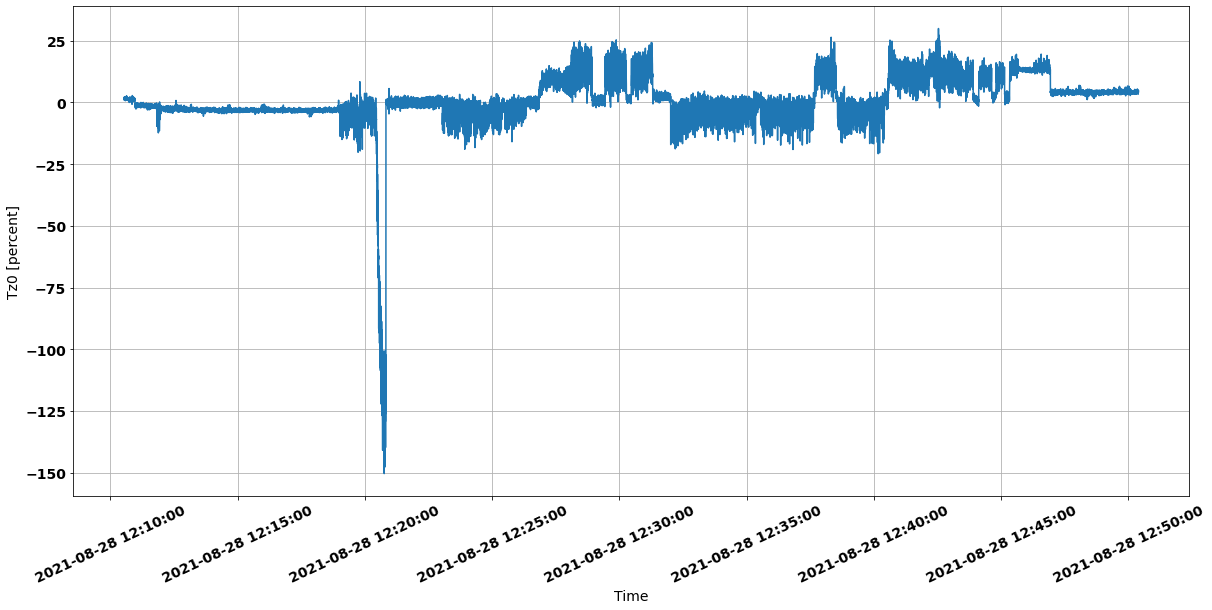

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates1=[dt.datetime.fromtimestamp(ts) for ts in df1["time_s"] ]
#dates2=[dt.datetime.fromtimestamp(ts) for ts in df2["time_s"] ]

plt.plot(dates1, df1["torque_0_Percent"])
plt.xlabel("Time")
plt.ylabel("Tz0 [percent]")
plt.grid('on')
#plt.ylim([-20, 10])

plt.show()

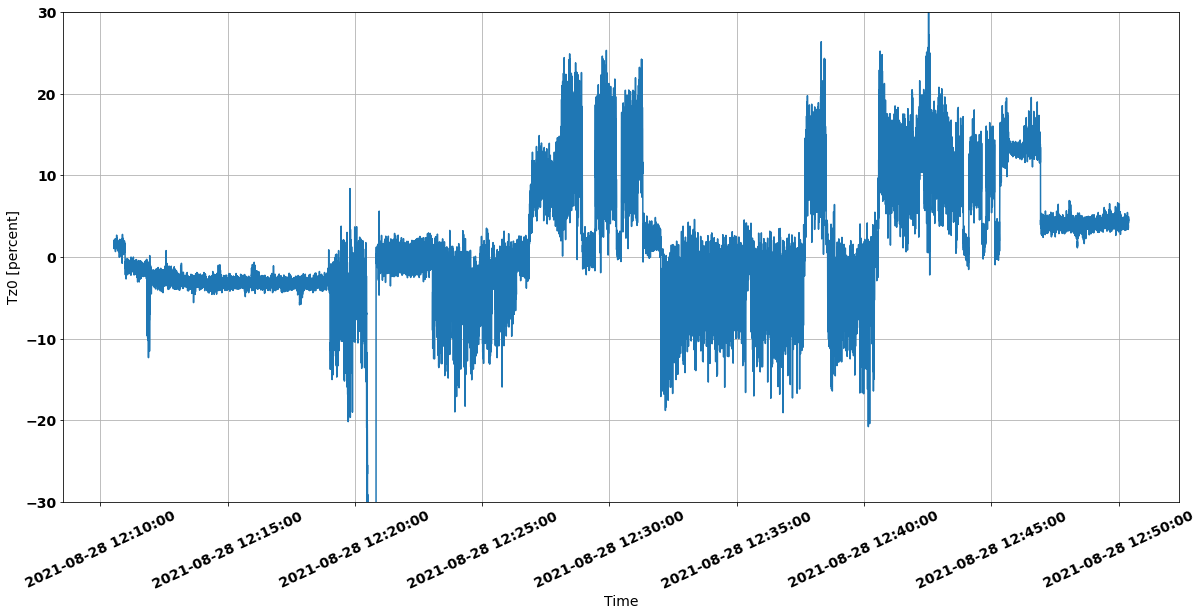

In [38]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates1=[dt.datetime.fromtimestamp(ts) for ts in df1["time_s"] ]
#dates2=[dt.datetime.fromtimestamp(ts) for ts in df2["time_s"] ]

plt.plot(dates1, df1["torque_0_Percent"])
plt.xlabel("Time")
plt.ylabel("Tz0 [percent]")
plt.grid('on')
plt.ylim([-30, 30])

plt.show()

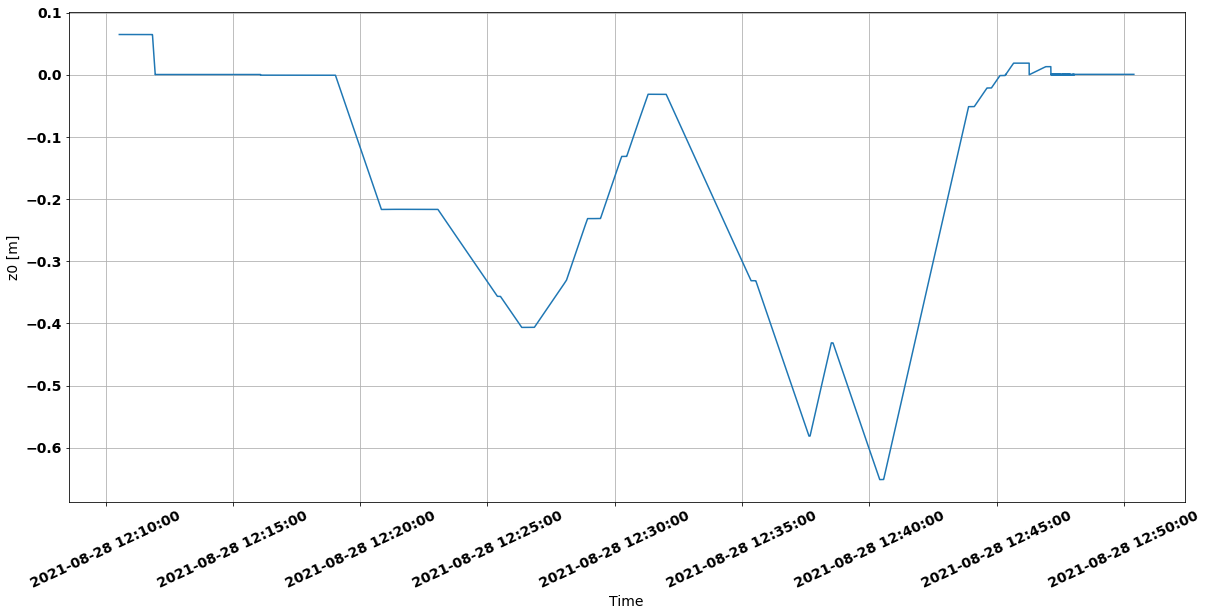

In [39]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates1=[dt.datetime.fromtimestamp(ts) for ts in df1["time_s"] ]
#dates2=[dt.datetime.fromtimestamp(ts) for ts in df2["time_s"] ]

plt.plot(dates1, df1["pos_0_m"])
plt.xlabel("Time")
plt.ylabel("z0 [m]")
plt.grid('on')
#plt.ylim([-20, 10])

plt.show()

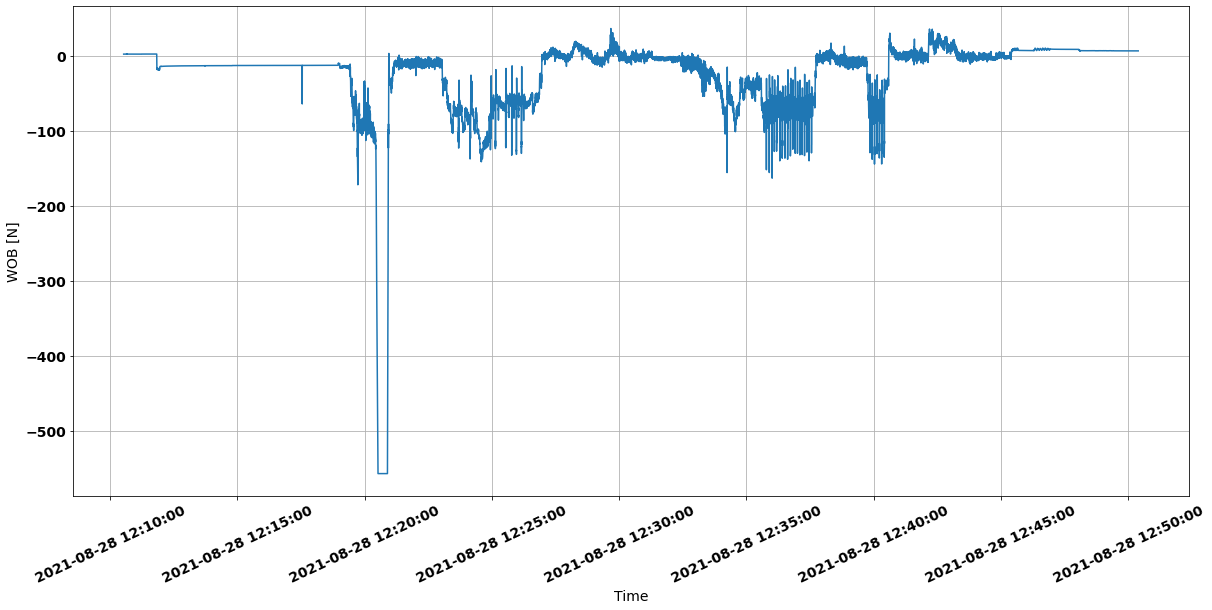

In [40]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates_wob=[dt.datetime.fromtimestamp(ts) for ts in df_wob["time_s"] ]

plt.plot(dates_wob, df_wob["wob_n"])
plt.xlabel("Time")
plt.ylabel("WOB [N]")
plt.grid('on')
#plt.ylim([-20, 10])

plt.show()

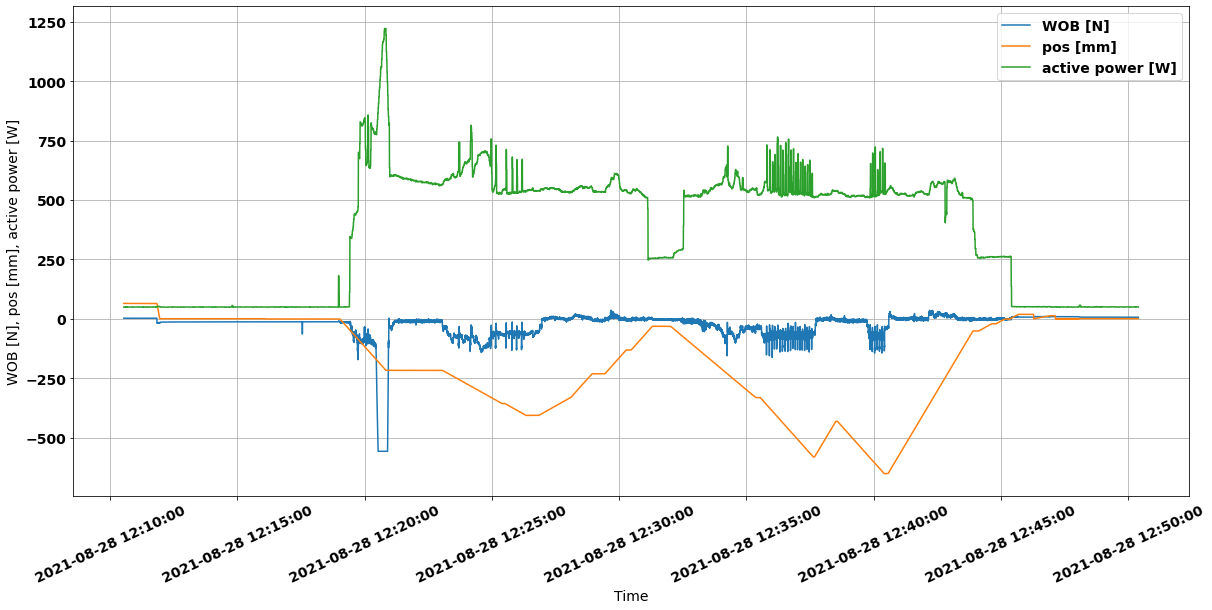

In [50]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates_wob=[dt.datetime.fromtimestamp(ts) for ts in df_wob["time_s"] ]
dates_power=[dt.datetime.fromtimestamp(ts) for ts in df_power["time_s"] ]

plt.plot(dates_wob, df_wob["wob_n"])
plt.plot(dates1, df1["pos_0_m"]*1000)
plt.plot(dates_power, df_power["active_power_W"])


plt.xlabel("Time")
plt.ylabel("WOB [N], pos [mm], active power [W]")
plt.legend(["WOB [N]", "pos [mm]", "active power [W]"])
plt.grid('on')
#plt.ylim([-20, 10])

plt.show()